# Case Study on Prediction of Cancer Mortality Rates for US counties.

## Karan Trehan
### 18BCS6033
### 18AITAIML1 - Group B

![Image of Cancer](cancer.jpg "Cancer")

#### We will be Building a multivariate Ordinary Least Squares regression model to predict "TARGET_deathRate".

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Importing the Required Libraries

In [2]:
#For Data Handling
import numpy as np
import pandas as pd

#For Data Visualization/Exploratory Analysis
from matplotlib import pyplot as plt
import seaborn as sns

#For Statistical Calculations
import scipy.stats as st

#For Regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE 
from sklearn.svm import SVR 

%matplotlib inline
sns.set(color_codes=True)

## Reading and Understanding the Data
Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [3]:
df = pd.read_csv('https://query.data.world/s/xlh353wvypzveoxm7h4u4c6hnucftk',encoding='iso-8859-1')

In [4]:
#Checking the number of rows and columns in the Dataset
df.shape

(3047, 34)

In [5]:
#Checking information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

There are 34 Columns in the Dataset.


*   3 Columns contain Missing Values
*   2 Columns are Object Type and the rest contain Numerical Values



In [6]:
#Viewing the Statistical Measures/Details of the Dataset
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


Since there are absurd values in some of the Features, it implies that the dataset contains outliers. For Example : The Maximum Age in 'MedianAge' Column is 624 which cannot be possible as no-one known to be alive for such a long period of time.
We'll treat these outliers later.

## Data Preparation and Pre-processing

In [7]:
#Checking the 'binnedInc' Column because it has Numeric values stored in string manner. 
df['binnedInc']

0        (61494.5, 125635]
1       (48021.6, 51046.4]
2       (48021.6, 51046.4]
3         (42724.4, 45201]
4       (48021.6, 51046.4]
               ...        
3042      (45201, 48021.6]
3043    (48021.6, 51046.4]
3044    (51046.4, 54545.6]
3045    (48021.6, 51046.4]
3046    (40362.7, 42724.4]
Name: binnedInc, Length: 3047, dtype: object

In [8]:
#Grouping the Dataframe based on 'binnedInc'
binnedInc = df.groupby('binnedInc')
binnedInc.first()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
binnedInc,,,,,,,,,,,,,,,,,,,,,
"(34218.1, 37413.8]",94.0,41,189.7,445.2,35615,16704,21.5,0.000000,41.5,40.9,...,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
"(37413.8, 40362.7]",250.0,97,175.9,461.8,37782,41516,23.2,0.000000,42.6,42.2,...,35.0,28.3,46.4,28.7,75.106455,0.616955,0.866157,8.356721,51.013900,4.204317
"(40362.7, 42724.4]",88.0,36,190.5,459.4,42579,13088,22.3,0.000000,49.3,48.4,...,37.8,29.9,48.1,26.6,91.787477,0.185071,0.208205,0.616903,53.446998,5.587583
"(42724.4, 45201]",427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
"(45201, 48021.6]",72.0,32,214.7,502.0,46383,9982,17.7,0.000000,45.2,45.1,...,38.9,37.0,46.9,24.3,98.234714,0.473373,0.000000,0.029586,49.746322,6.267540
"(48021.6, 51046.4]",173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
"(51046.4, 54545.6]",428.0,152,176.0,505.4,52313,61023,15.6,180.259902,45.4,43.5,...,38.8,32.6,43.2,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476
"(54545.6, 61494.5]",4025.0,1380,177.8,510.9,60397,843954,13.1,427.748432,35.8,34.7,...,59.4,44.4,31.4,16.5,74.729668,6.710854,6.041472,2.699184,50.063573,5.533430
"(61494.5, 125635]",1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,61.6,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831


* We can see that in 'binnedInc', we have the ranges of Income of every county.
* We can also infer that by removing '(' ; '[' ; ']' and ',' and then averaging the two values obtained, the column can be converted to float64 type.

In [9]:
#Converting the String values in 'binnedInc' to Float type by splitting the values and averaging them
df['binnedInc']=df['binnedInc'].str.replace('(','')
df['binnedInc']=df['binnedInc'].str.replace('[','')
df['binnedInc']=df['binnedInc'].str.replace(']','')

a=df['binnedInc'].str.split(',',expand=True).astype(float)
b=(a[0]+a[1])/2
df['binnedInc']=b
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,93564.75,39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,49534.00,33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,49534.00,45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,43962.70,42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,49534.00,48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [10]:
#Checking the 'Geography' Column for duplicate values.
df['Geography'].is_unique

True

We can observe that the Geography column has Unique Values and it will be redundant to create Dummy Variables for it (it will increase the complexity of the Model), so we will drop the column.



In [11]:
df = df.drop(columns = ['Geography'],axis=1)

## Univariate Analysis of Columns

In [12]:
#For plotting the Distribution Plot of all the columns, we temporarily create a copy of our main dataframe. 
#In the copy dataframe , 'df2' , we impute all the missing values, so that the Distribution Plots can be plotted for all columns
df2 = df.copy()
df2['PctSomeCol18_24'] = df2['PctSomeCol18_24'].fillna(df2['PctSomeCol18_24'].median())
df2['PctEmployed16_Over'] = df2['PctEmployed16_Over'].fillna(df2['PctEmployed16_Over'].median())
df2['PctPrivateCoverageAlone'] = df2['PctPrivateCoverageAlone'].fillna(df2['PctPrivateCoverageAlone'].median())

In [13]:
#Defining a function 'distributionPlot()' which can be used for plotting the distribution plots for all columns of the Dataframe
#passed as an argument

def distributionPlot(df,Title):
    # 'n' will store the number of Columns
    n = df.shape[1]
    
    #We will plot the Graphs in a 8x4 or a 9x4 Subplots
    #Rows will be 8 when the number of columns passed will be 32
    #Rows will be 9 when the number of columns passed will be > 32
    if(n%4==0):
        rows = 8
    else:
        rows = 9
    cols = 4
    
    #Creating subplots
    fig, axs = plt.subplots(rows,cols, figsize = (15, 50))
    fig.subplots_adjust(top=0.8)
    
    #Defining the color schemes
    colors = ['#3E37FF', '#3BFF00', '#FF6050', '#00FFEA', '#BA00FF', '#FFFE00', '#FF36DD','orange'] # to set color
    
    #Looping through the DataFrame and plotting for each Column
    k=0
    j=0
    for i, var in enumerate(df.columns.values):
        
        if (j%4==0 and j!=0):
            k+=1
        if (j%8==0 and j!=0):
            j=0
    
        sns.distplot(df[var],ax=axs[k, i-int(k*4)],color=colors[j],kde_kws=dict(linewidth=4),hist=True)
        axs[k, i-int(k*4)].set_xlabel(var, fontsize = 'large')
        j+=1
    
    #Providing Tiltle for the Plot    
    plt.suptitle(Title, fontsize = 'xx-large',y=0.815)
    plt.show()

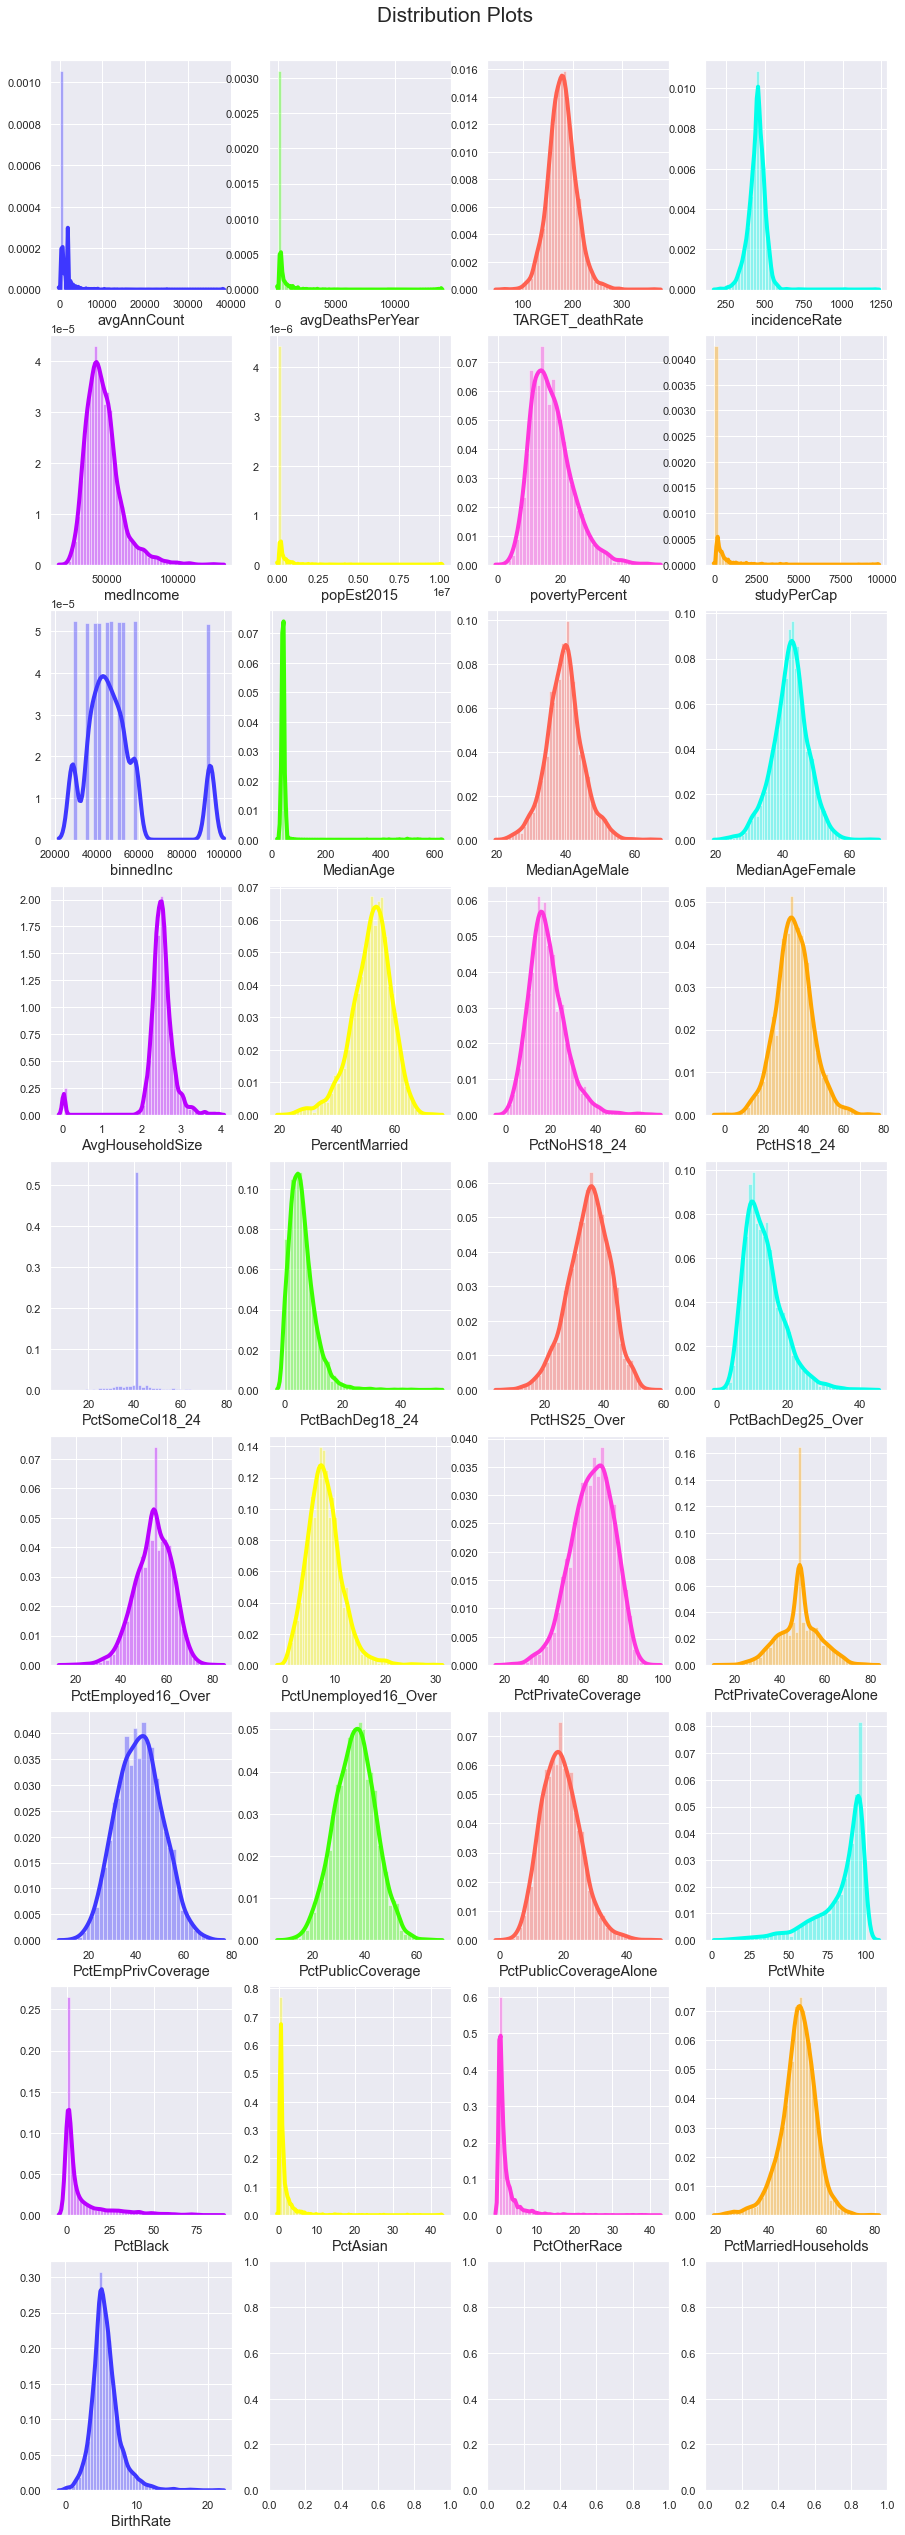

In [14]:
#Plotting Distribution Plots
distributionPlot(df2,"Distribution Plots")

We can Infer from the above plots that many Features are both Positively and Negatively Skewed.

In [15]:
#Defining a function 'boxPlot()' which can be used for plotting the box-plots for all columns of the Dataframe passed as
#an argument
def boxPlot(df,Title):
    # 'n' will store the number of Columns
    n = df.shape[1]
    
    #We will plot the Graphs in a 8x4 or a 9x4 Subplots
    #Rows will be 8 when the number of columns passed will be 32
    #Rows will be 9 when the number of columns passed will be > 32
    if(n%4==0):
        rows = 8
    else:
        rows = 9
    cols = 4
    
    #Creating subplots
    fig, axs = plt.subplots(rows,cols, figsize = (15, 50))
    
    #Defining the color schemes
    colors = ['#3E37FF', '#3BFF00', '#FF6050', '#00FFEA', '#BA00FF', '#FFFE00', '#FF36DD','orange'] # to set color
    
    #Looping through the DataFrame and plotting for each Column
    k=0
    j=0
    for i, var in enumerate(df.columns.values):
        if (j%4==0 and j!=0):
            k+=1
        if (j%8==0 and j!=0):
            j=0
    
        sns.boxplot(data = df[var] , ax = axs[k, i-int(k*4)], color= colors[j],linewidth=2)
        axs[k, i-int(k*4)].set_xlabel(var, fontsize = 'large')
        j+=1
    
    #Providing Tiltle for the Plot 
    plt.suptitle(Title, fontsize = 'xx-large',y=0.89)
    plt.show()

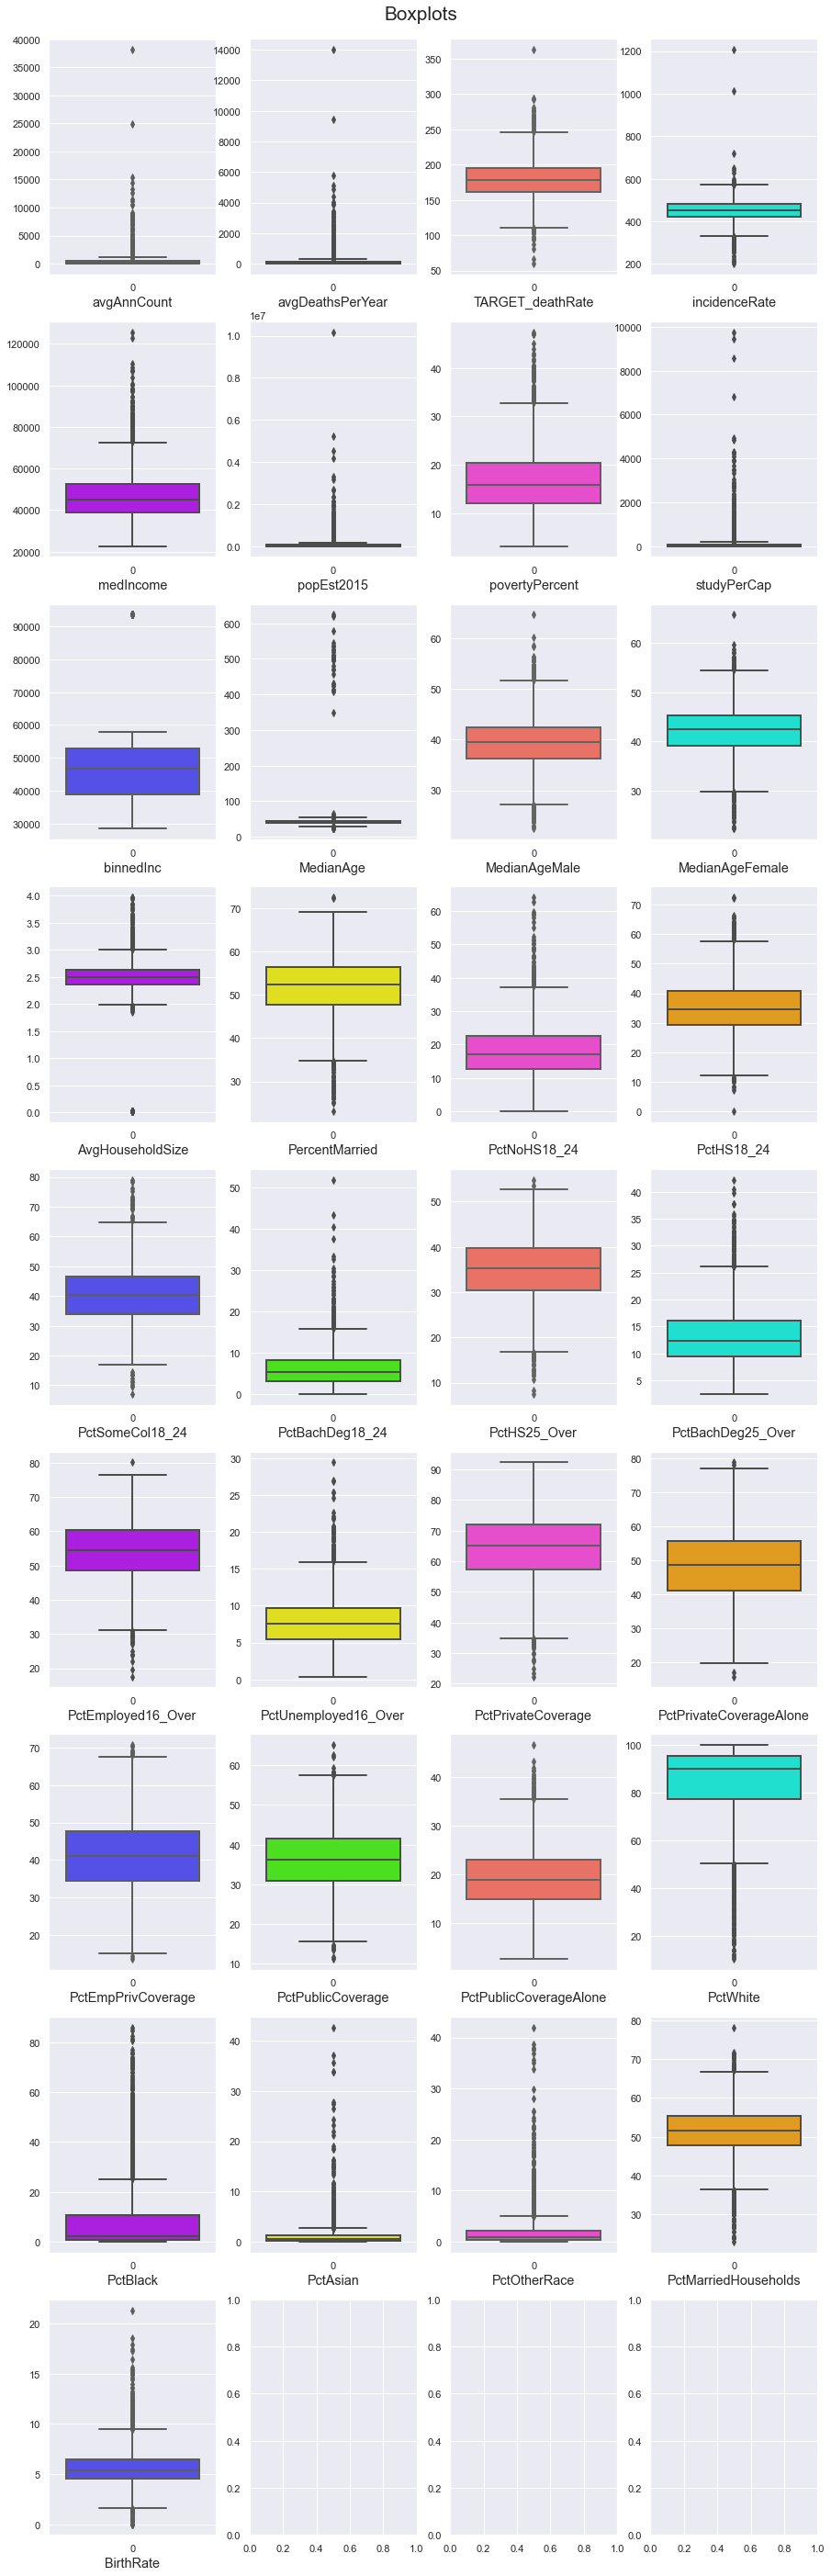

In [16]:
#Plotting Boxplots Plots
boxPlot(df,Title = "Boxplots")

We can Observe that many Features contain Outliers, including the Target Variable

# Bi-Variate Analysis

In [17]:
#Defining a function 'scatterPlot()' which can be used for plotting the scatter-plots for all columns v/s 'TARGET_deathRate'
#(dependent Variable) of the Dataframe passed as an argument

def scatterPlot(df,Title):
    # 'n' will store the number of Columns
    n = df.shape[1]
    
    #We will plot the Graphs in a 8x4 or a 9x4 Subplots
    #Rows will be 8 when the number of columns passed will be 32
    #Rows will be 9 when the number of columns passed will be > 32
    if(n%4==0):
        rows = 8
    else:
        rows = 9
    cols = 4
    
    #Creating subplots
    fig, axs = plt.subplots(rows,cols, figsize = (15, 50))
    
    #Defining the color schemes
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'pink','k'] # to set color
    
    #Looping through the DataFrame and plotting for each Column
    k=0
    j=0
    for i, var in enumerate(df.columns.values):
        if (j%4==0 and j!=0):
            k+=1
        if (j%8==0 and j!=0):
            j=0
        
        axs[k, i-int(k*4)].scatter(df[var], df["TARGET_deathRate"], color = colors[j])
        axs[k, i-int(k*4)].set_xlabel(var, fontsize = 'large')
        j+=1
    
    #Providing Tiltle for the Plot 
    plt.suptitle(Title, fontsize = 'xx-large',y=0.89)
    plt.show()

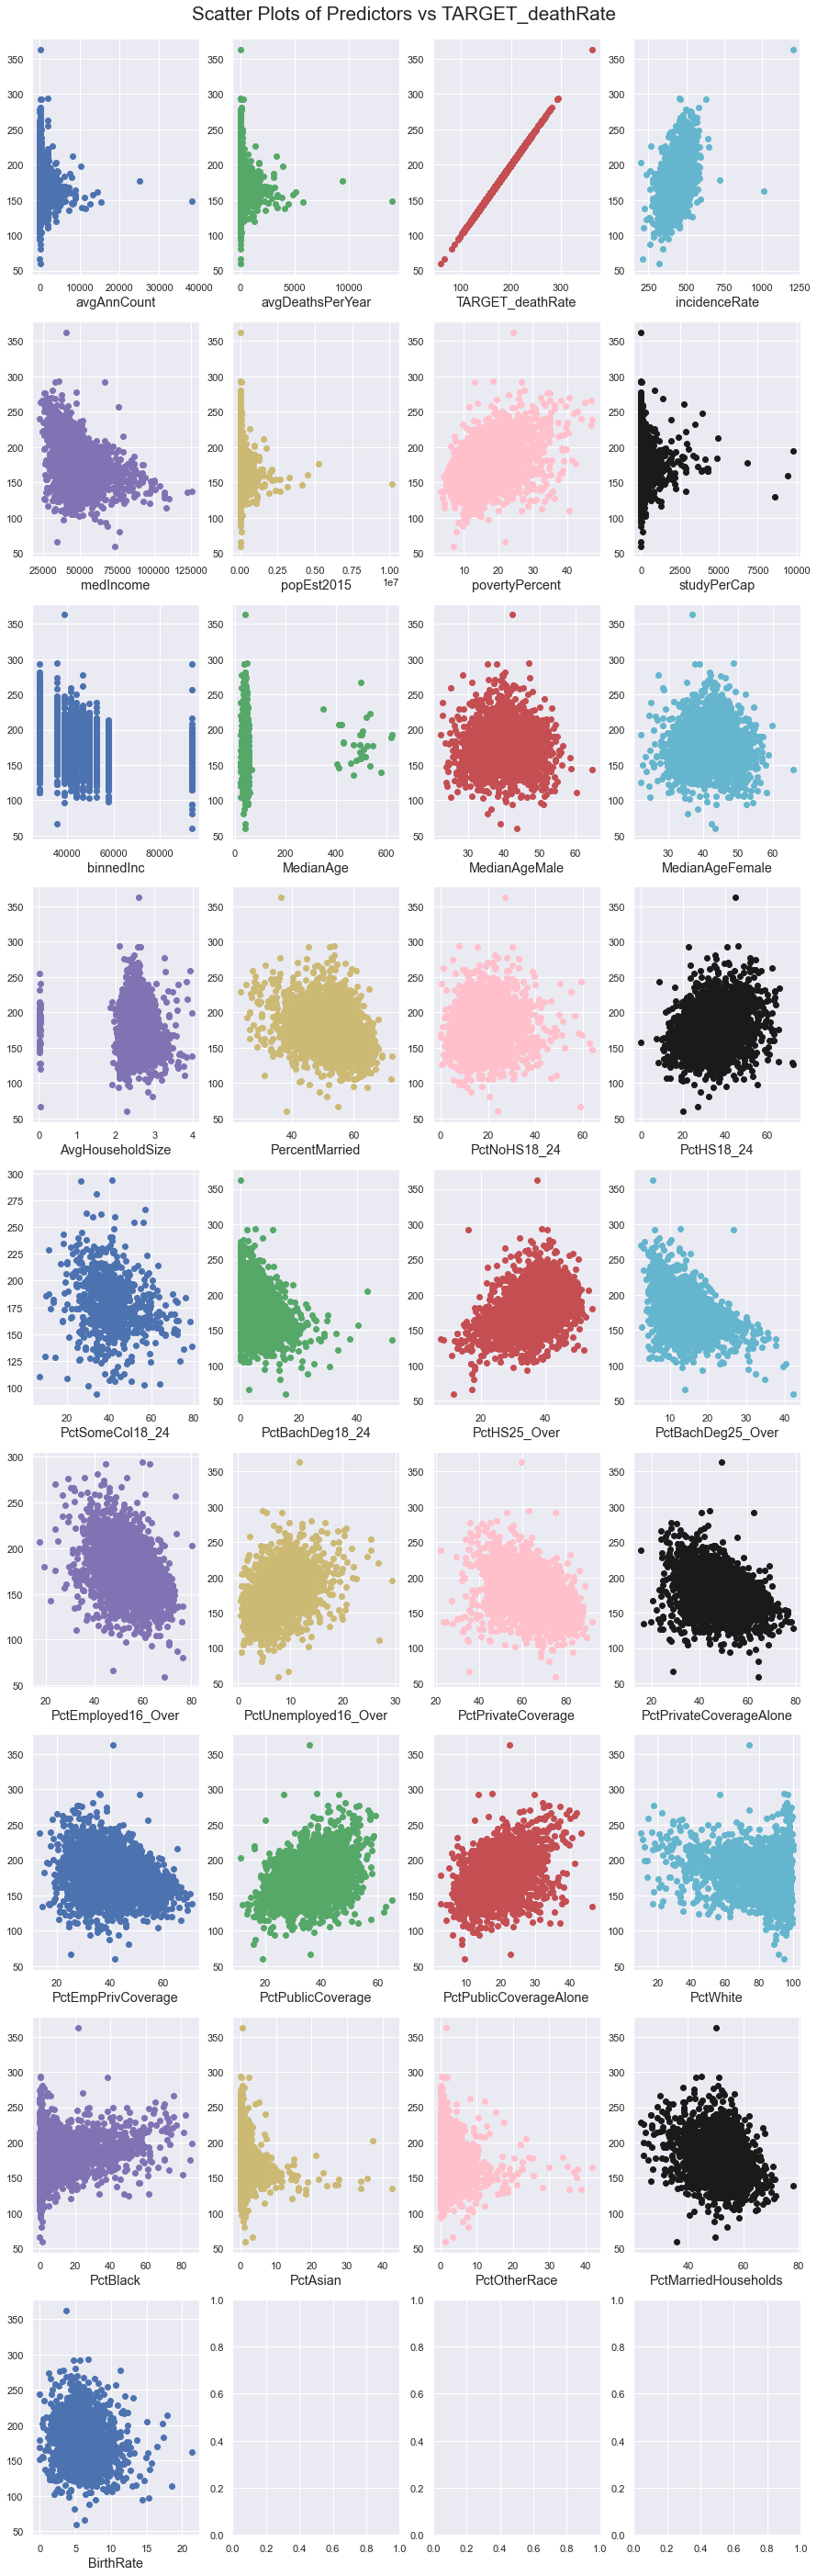

In [18]:
#Plotting Scatter Plots v/s 'TARGET_deathRate' (dependent Variable)
scatterPlot(df,"Scatter Plots of Predictors vs TARGET_deathRate")

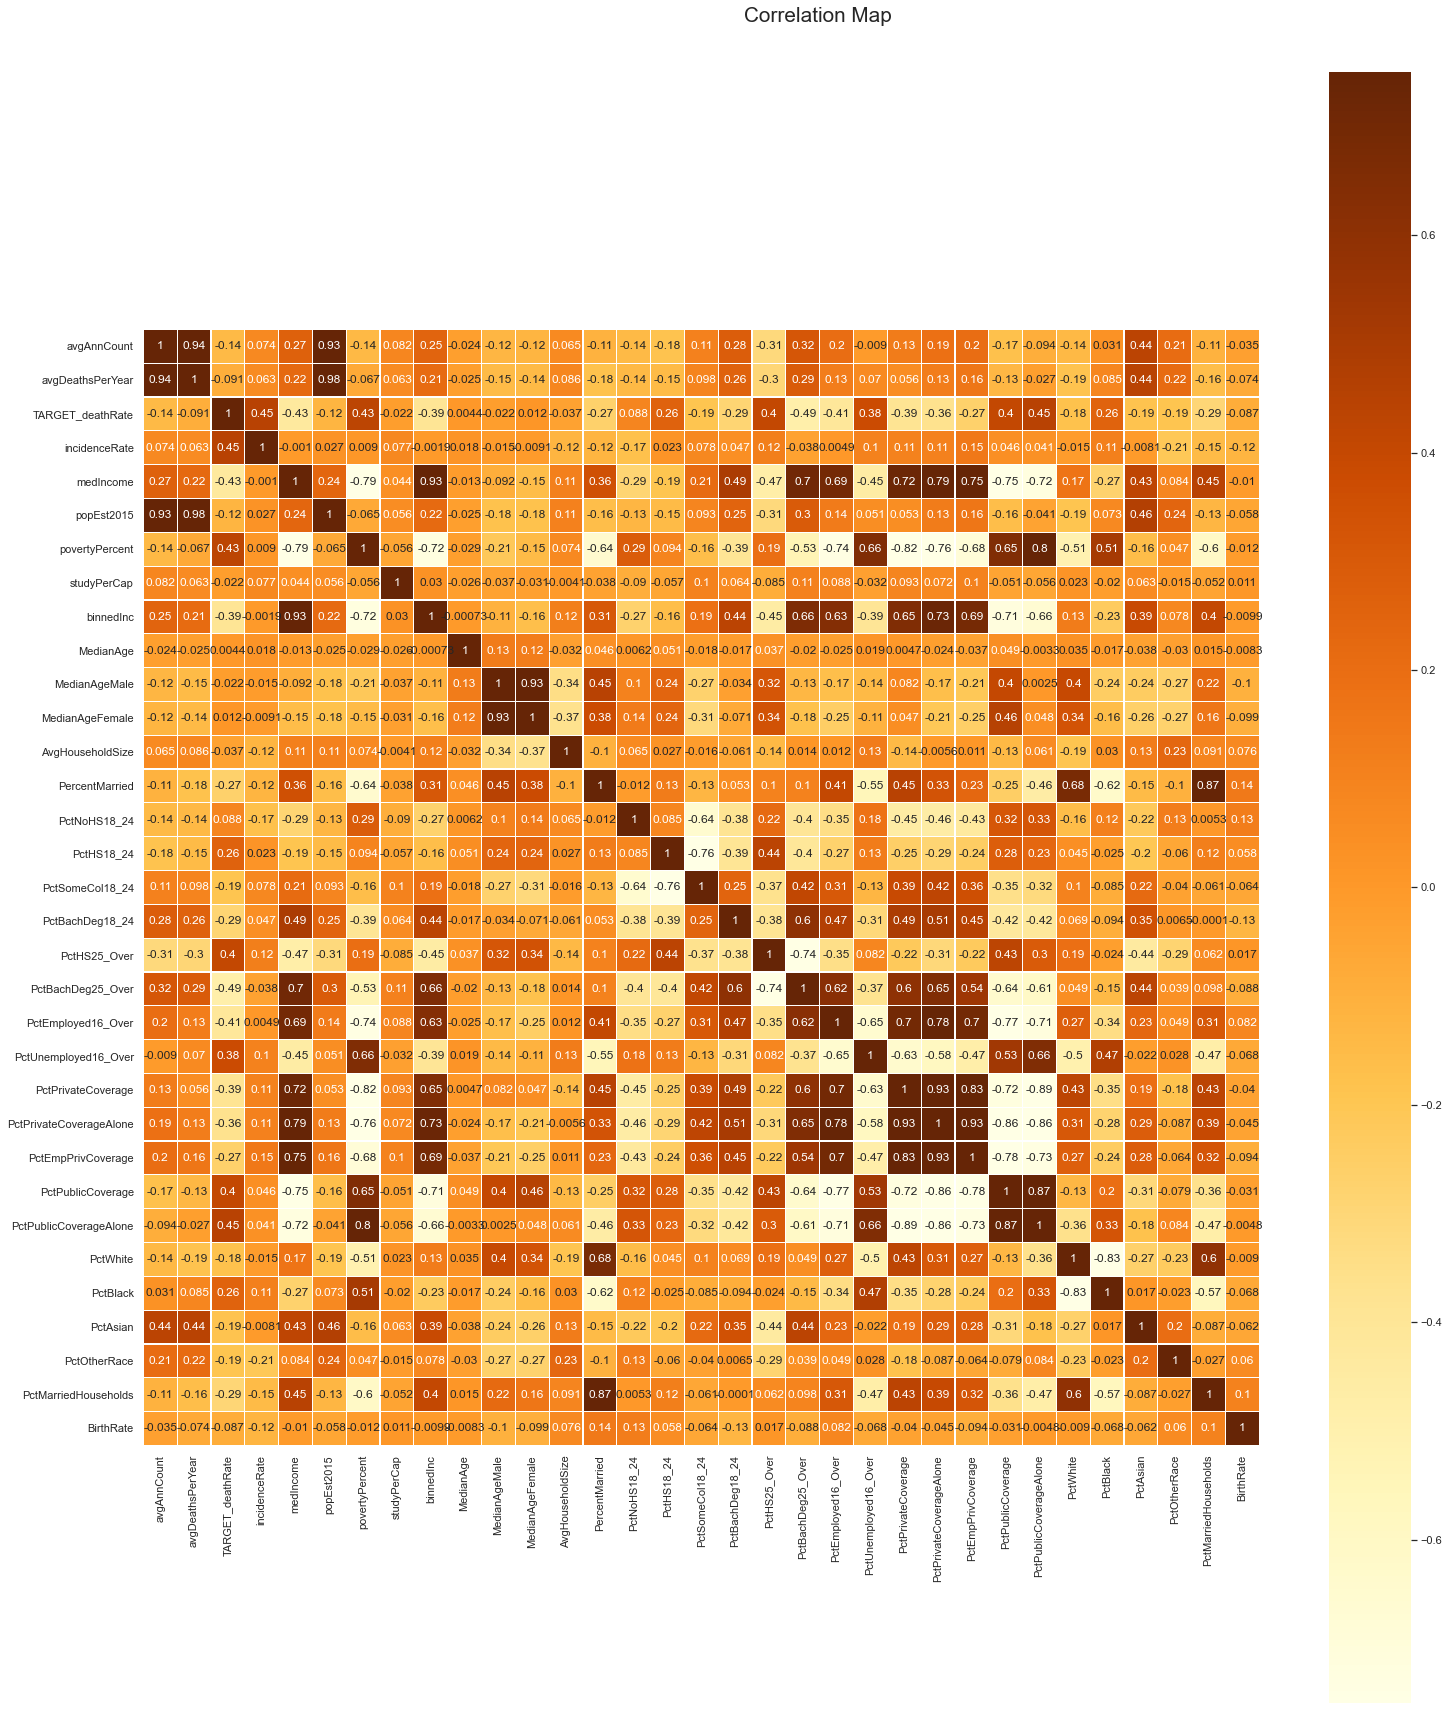

In [19]:
#Plotting the Correlation Map to check correlation between the columns and w.r.t. 'TARGET_deathRate'
plt.figure(figsize=(25,30))
sns.heatmap(df.corr(),cmap='YlOrBr',linewidths = 0.25, square = True, annot = True, vmin=-0.75, vmax=0.75)
plt.suptitle("Correlation Map", fontsize = 'xx-large',y=0.91)
plt.show()

It can be observed that Multiple Predictor Variables have high Correlation implying that Multicollinearity exists in the Dataset.

## Checking for Missing and Duplicated Values

In [20]:
#Using duplicated() method to check for Duplicate Values
df[df.duplicated()].count()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

This implies that there are no duplicated rows in the DataFrame.

In [21]:
#Checking the Percentage of Columns having Missing Values
round(df.isnull().sum()/df.shape[0]*100,2)

avgAnnCount                 0.00
avgDeathsPerYear            0.00
TARGET_deathRate            0.00
incidenceRate               0.00
medIncome                   0.00
popEst2015                  0.00
povertyPercent              0.00
studyPerCap                 0.00
binnedInc                   0.00
MedianAge                   0.00
MedianAgeMale               0.00
MedianAgeFemale             0.00
AvgHouseholdSize            0.00
PercentMarried              0.00
PctNoHS18_24                0.00
PctHS18_24                  0.00
PctSomeCol18_24            74.99
PctBachDeg18_24             0.00
PctHS25_Over                0.00
PctBachDeg25_Over           0.00
PctEmployed16_Over          4.99
PctUnemployed16_Over        0.00
PctPrivateCoverage          0.00
PctPrivateCoverageAlone    19.99
PctEmpPrivCoverage          0.00
PctPublicCoverage           0.00
PctPublicCoverageAlone      0.00
PctWhite                    0.00
PctBlack                    0.00
PctAsian                    0.00
PctOtherRa

We infer that 'PctSomeCol18_24' has high Missing Value Percentage (74.99%) so Dropping this column.

In [22]:
#Dropping the Column for the stated above
df = df.drop(columns = ['PctSomeCol18_24'],axis=1)

Imputing the Null Values in the remaining two Columns with the values of their respective medians

In [23]:
#Imputing the Null Values by median of the respective columns
df['PctEmployed16_Over'] = df['PctEmployed16_Over'].fillna(df['PctEmployed16_Over'].median())
df['PctPrivateCoverageAlone'] = df['PctPrivateCoverageAlone'].fillna(df['PctPrivateCoverageAlone'].median())

In [24]:
#Again Checking the Percentage of Columns having Missing Values in case all the values have not been imputed. 
round(df.isnull().sum()/df.shape[0]*100,2)

avgAnnCount                0.0
avgDeathsPerYear           0.0
TARGET_deathRate           0.0
incidenceRate              0.0
medIncome                  0.0
popEst2015                 0.0
povertyPercent             0.0
studyPerCap                0.0
binnedInc                  0.0
MedianAge                  0.0
MedianAgeMale              0.0
MedianAgeFemale            0.0
AvgHouseholdSize           0.0
PercentMarried             0.0
PctNoHS18_24               0.0
PctHS18_24                 0.0
PctBachDeg18_24            0.0
PctHS25_Over               0.0
PctBachDeg25_Over          0.0
PctEmployed16_Over         0.0
PctUnemployed16_Over       0.0
PctPrivateCoverage         0.0
PctPrivateCoverageAlone    0.0
PctEmpPrivCoverage         0.0
PctPublicCoverage          0.0
PctPublicCoverageAlone     0.0
PctWhite                   0.0
PctBlack                   0.0
PctAsian                   0.0
PctOtherRace               0.0
PctMarriedHouseholds       0.0
BirthRate                  0.0
dtype: f

We can infer that Multiple Features Contain Outliers including the Target Variable , 'TARGET_deathRate', so we need to treat these outliers.

## Capping the Outliers

In [25]:
#Creating a copy of the original Dataframe which will be used in the Notebook from now onwards
final_df = df.copy()

#Bringing the values of Outliers between 0.01 and 0.99 Quantile
#This may add a little Bias to the Dataset but it's better than dropping the rows containing Outliers as,
#Almost 2/3rd of the rows are dropped if we drop the Rows containing  Outliers.
#Hence Capping is more feasible in this case
for col in final_df.columns:
    print("Capping The",col)
    
    #The values less than 0.01 Quantile are brought to 0.01 Quantile and
    #The values greater than 0.99 Quantile are brought to 0.99 Quantile.
    if (((final_df[col].dtype)=='float64') | ((final_df[col].dtype)=='int64')):
        percentiles = final_df[col].quantile([0.01,0.99]).values
        final_df[col][final_df[col] <= percentiles[0]] = percentiles[0]
        final_df[col][final_df[col] >= percentiles[1]] = percentiles[1]
    
    #In case of Categorical Variables
    else:
        final_df[col]=final_df[col]

Capping The avgAnnCount
Capping The avgDeathsPerYear
Capping The TARGET_deathRate
Capping The incidenceRate
Capping The medIncome
Capping The popEst2015
Capping The povertyPercent
Capping The studyPerCap
Capping The binnedInc
Capping The MedianAge
Capping The MedianAgeMale
Capping The MedianAgeFemale
Capping The AvgHouseholdSize
Capping The PercentMarried
Capping The PctNoHS18_24
Capping The PctHS18_24
Capping The PctBachDeg18_24
Capping The PctHS25_Over
Capping The PctBachDeg25_Over
Capping The PctEmployed16_Over
Capping The PctUnemployed16_Over
Capping The PctPrivateCoverage
Capping The PctPrivateCoverageAlone
Capping The PctEmpPrivCoverage
Capping The PctPublicCoverage
Capping The PctPublicCoverageAlone
Capping The PctWhite
Capping The PctBlack
Capping The PctAsian
Capping The PctOtherRace
Capping The PctMarriedHouseholds
Capping The BirthRate


In [26]:
#Again checking the Statistics of the Final Dataset after Outlier Treatment
final_df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,561.637369,169.728408,178.620553,447.962187,46964.201464,9.053098e+04,16.844534,138.716908,48878.118280,41.057716,...,48.495823,41.189785,36.246004,19.226148,83.709524,9.020747,1.159109,1.900508,51.254326,5.623223
std,961.316735,328.365958,26.830895,50.103072,11525.261203,1.904633e+05,6.240246,371.706993,16889.719362,5.529938,...,8.850783,9.327220,7.700855,5.991119,16.108120,14.161351,1.812262,2.923984,6.375559,1.864892
min,11.000000,4.000000,114.246000,297.614000,27438.880000,1.905040e+03,6.000000,0.000000,28429.050000,27.900000,...,26.600000,20.600000,18.546000,7.400000,26.180228,0.000000,0.000000,0.000000,31.653827,1.547823
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,38888.250000,37.700000,...,43.100000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,46611.300000,41.000000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,52796.000000,44.000000,...,53.800000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,5932.920000,2169.660000,254.300000,561.670000,86982.180000,1.236855e+06,36.016000,2477.718821,93564.750000,62.402000,...,69.154000,63.154000,53.908000,36.054000,98.605393,64.460731,11.572793,17.499236,66.102467,12.083967


We can see that Much of the Outliers are brought in range, For example : Max MedainAge is now 62.402000.
Outlier Treatment has refined the Dataset by a bit

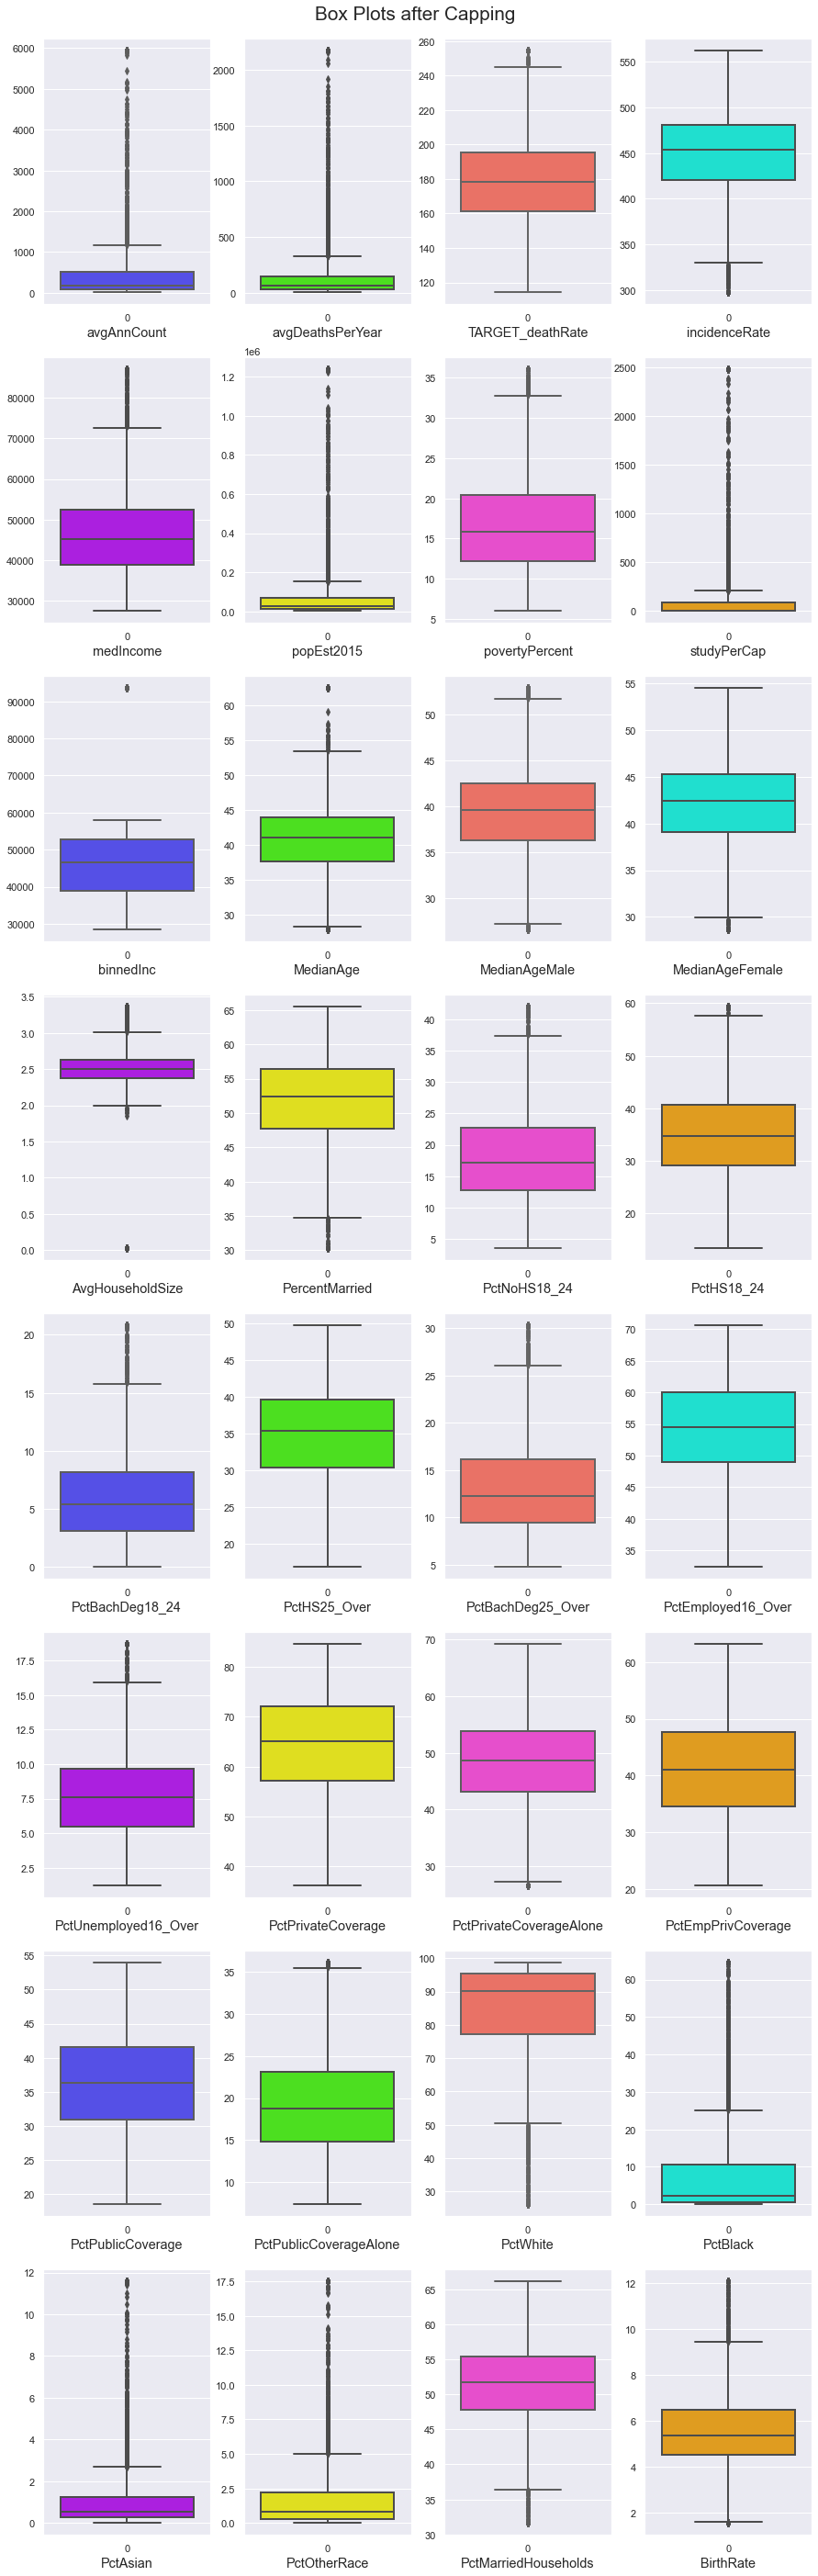

In [27]:
#Plotting Boxplots Plots after Outlier Treatment to see the Impact
boxPlot(final_df,"Box Plots after Capping")

We can Observe that the Outliers for many variables have been Treated to a very high extent.

## Transforming the Skewed Variables

In [28]:
#Creating two lists for columns which are Right Skewednand Left Skewed
right_skewed=[]
left_skewed=[]

#Column Names of Columns having Skewness greater than 0.5 are placed in the right_skewed list and vice versa for left_skewed
for i in  final_df.columns:
    if st.skew(final_df[i])>0.5:
        right_skewed.append(i)
    elif st.skew(final_df[i])<-0.5:
        left_skewed.append(i)

#Printing the Lists
print('Right Skewed :\n ', right_skewed,'\n\nLeft  Skewed :\n ',left_skewed)

Right Skewed :
  ['avgAnnCount', 'avgDeathsPerYear', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc', 'PctNoHS18_24', 'PctBachDeg18_24', 'PctBachDeg25_Over', 'PctUnemployed16_Over', 'PctBlack', 'PctAsian', 'PctOtherRace', 'BirthRate'] 

Left  Skewed :
  ['AvgHouseholdSize', 'PercentMarried', 'PctWhite']


In [29]:
#Checking Stats of the Skewed Columns
df[right_skewed + left_skewed].describe()

,avgAnnCount,avgDeathsPerYear,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,PctNoHS18_24,PctBachDeg18_24,PctBachDeg25_Over,PctUnemployed16_Over,PctBlack,PctAsian,PctOtherRace,BirthRate,AvgHouseholdSize,PercentMarried,PctWhite
count,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,47063.281917,1.026374e+05,16.878175,155.399415,48878.118280,18.224450,6.158287,13.282015,7.852412,9.107978,1.253965,1.983523,5.640306,2.479662,51.773679,83.645286
std,1416.356223,504.134286,12040.090836,3.290592e+05,6.409087,529.628366,16889.719362,8.093064,4.529059,5.394756,3.452371,14.534538,2.610276,3.517710,1.985816,0.429174,6.896928,16.380025
min,6.000000,3.000000,22640.000000,8.270000e+02,3.200000,0.000000,28429.050000,0.000000,0.000000,2.500000,0.400000,0.000000,0.000000,0.000000,0.000000,0.022100,23.100000,10.199155
25%,76.000000,28.000000,38882.500000,1.168400e+04,12.150000,0.000000,38888.250000,12.800000,3.100000,9.400000,5.500000,0.620675,0.254199,0.295172,4.521419,2.370000,47.750000,77.296180
50%,171.000000,61.000000,45207.000000,2.664300e+04,15.900000,0.000000,46611.300000,17.100000,5.400000,12.300000,7.600000,2.247576,0.549812,0.826185,5.381478,2.500000,52.400000,90.059774
75%,518.000000,149.000000,52492.000000,6.867100e+04,20.400000,83.650776,52796.000000,22.700000,8.200000,16.100000,9.700000,10.509732,1.221037,2.177960,6.493677,2.630000,56.400000,95.451693
max,38150.000000,14010.000000,125635.000000,1.017029e+07,47.400000,9762.308998,93564.750000,64.100000,51.800000,42.200000,29.400000,85.947799,42.619425,41.930251,21.326165,3.970000,72.500000,100.000000


In [30]:
#If the columns in the right_skewed list have minimum value 0, then they undergo Square-Root Transformation
#Else the columns undergo Logarithmic Transformation
for i in right_skewed:
    if (min(df[i]) == 0):
        final_df[i]= np.sqrt((final_df[i]))
    else:
        final_df[i]= np.log((final_df[i]))

#All the columns in left_skewed list go Squared Transformation
for i in left_skewed:
        final_df[i]= ((final_df[i])**2)

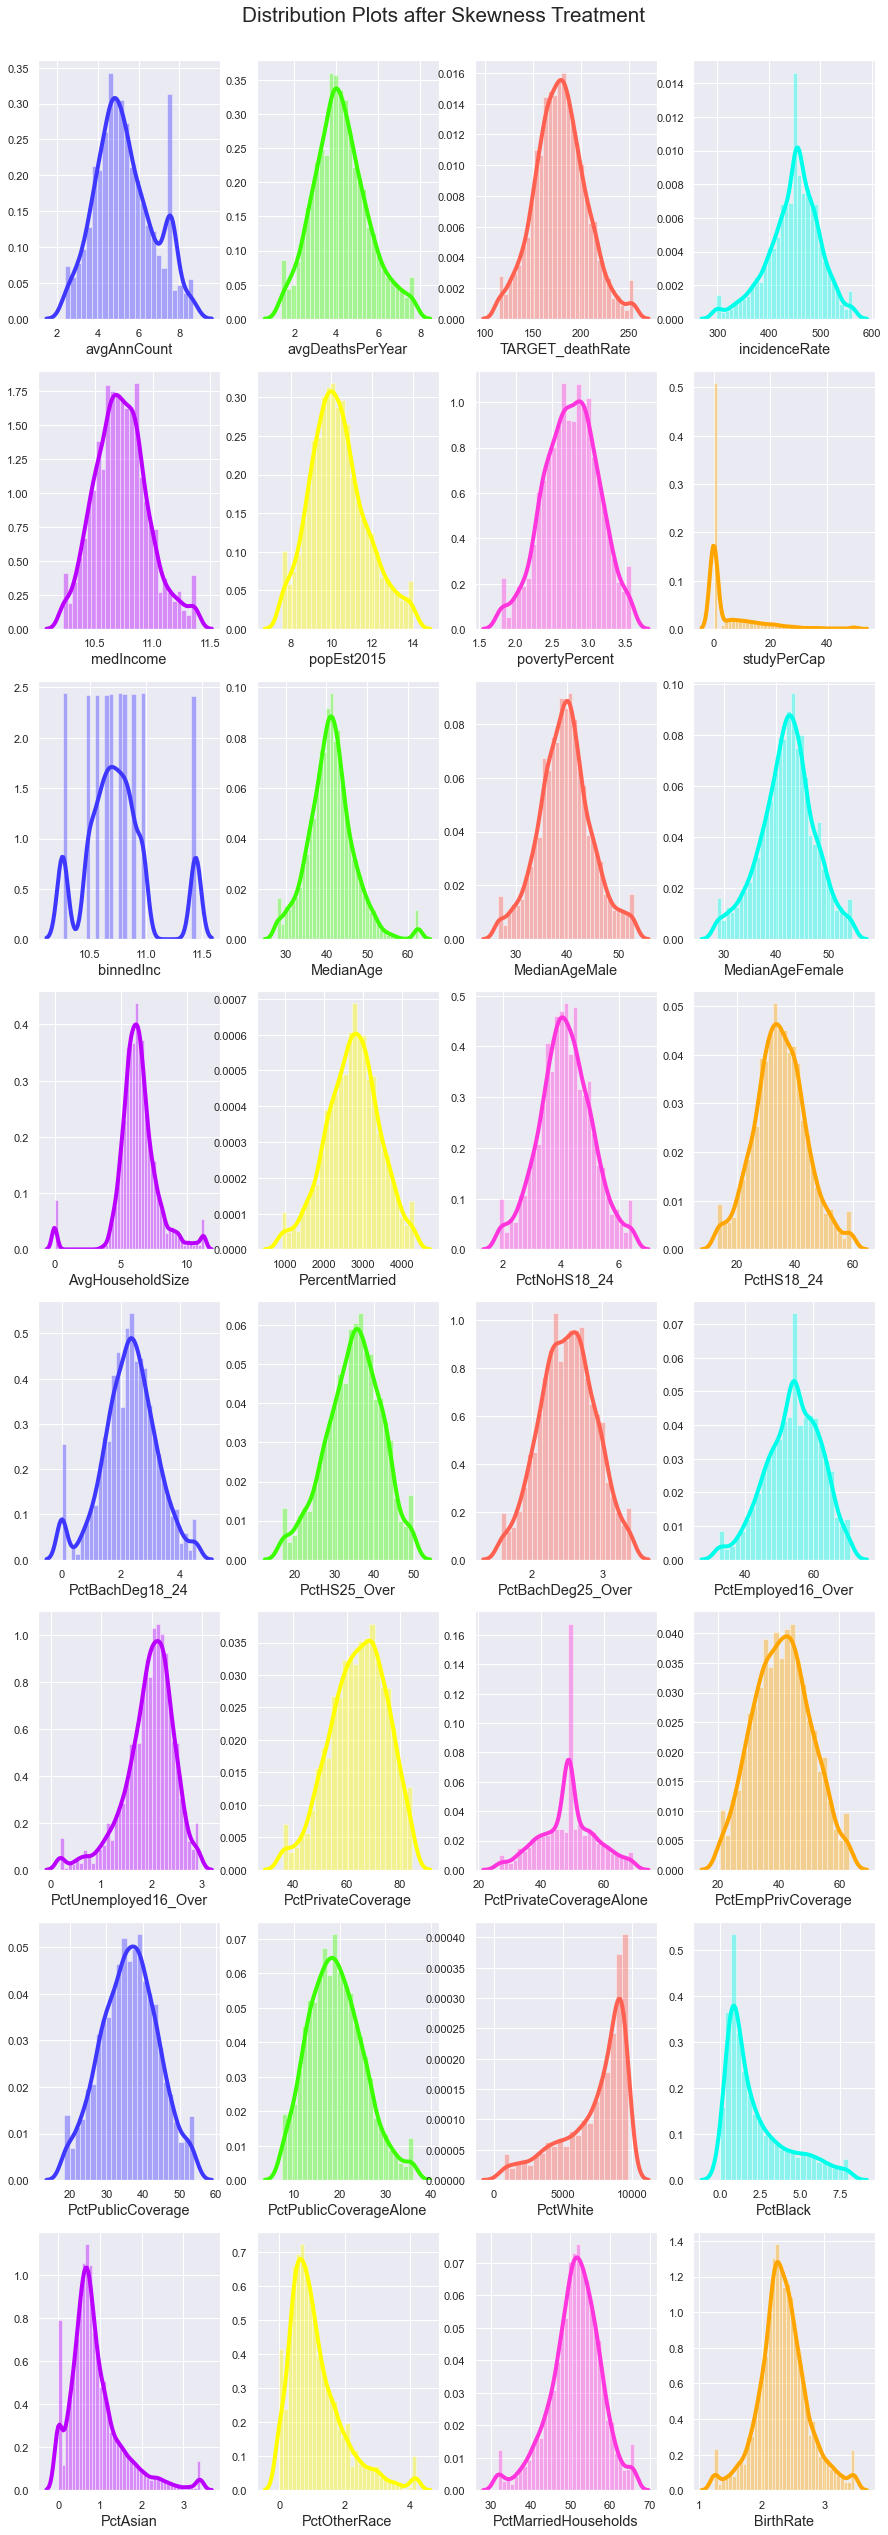

In [31]:
#Checking the Skewness of All the columns after Skewness Treatment
distributionPlot(final_df,"Distribution Plots after Skewness Treatment")

The Skewness Treatment has brought almost all the Columns to Normal Distribution.

In [32]:
#Checking the stats to observe any change
final_df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,5.319542,4.210056,178.620553,447.962187,10.729368,10.330772,2.755976,5.878143,10.747857,41.057716,...,48.495823,41.189785,36.246004,19.226148,7266.670839,2.264601,0.876667,1.108045,51.254326,2.338994
std,1.414317,1.295532,26.830895,50.103072,0.232604,1.388662,0.373177,10.207769,0.302164,5.529938,...,8.850783,9.327220,7.700855,5.991119,2308.844505,1.973222,0.625054,0.820344,6.375559,0.390360
min,2.397895,1.386294,114.246000,297.614000,10.219716,7.552258,1.791759,0.000000,10.255167,27.900000,...,26.600000,20.600000,18.546000,7.400000,685.404341,0.000000,0.000000,0.000000,31.653827,1.244115
25%,4.330733,3.332205,161.200000,420.300000,10.568300,9.365974,2.497321,0.000000,10.568447,37.700000,...,43.100000,34.500000,30.900000,14.850000,5974.700036,0.787829,0.504182,0.543297,47.763063,2.126363
50%,5.141664,4.110874,178.100000,453.549422,10.719007,10.190282,2.766319,0.000000,10.749598,41.000000,...,48.700000,41.100000,36.300000,18.800000,8110.762927,1.499192,0.741493,0.908947,51.669941,2.319801
75%,6.249975,5.003946,195.200000,480.850000,10.868416,11.137082,3.015535,9.146077,10.874191,44.000000,...,53.800000,47.700000,41.550000,23.100000,9111.025854,3.241870,1.105006,1.475791,55.395132,2.548269
max,8.688272,7.682326,254.300000,561.670000,11.373459,14.028083,3.583963,49.776690,11.446409,62.402000,...,69.154000,63.154000,53.908000,36.054000,9723.023570,8.028744,3.401881,4.183209,66.102467,3.476200


## Scaling the Features

In [33]:
#Scaling the Features between 0 - 1, for easier and efficient performance by the Model
scaler = MinMaxScaler()
num_vars = final_df.columns
final_df[num_vars] = scaler.fit_transform(final_df[num_vars])
final_df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,0.464463,0.448499,0.459641,0.569380,0.441738,0.429059,0.538006,0.118090,0.413594,0.381361,...,0.514542,0.483851,0.500537,0.412722,0.728208,0.282062,0.257701,0.264879,0.568977,0.490518
std,0.224838,0.205770,0.191575,0.189744,0.201608,0.214438,0.208223,0.205071,0.253654,0.160279,...,0.207989,0.219186,0.217772,0.209085,0.255470,0.245770,0.183738,0.196104,0.185074,0.174886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.307269,0.309069,0.335256,0.464621,0.302133,0.280075,0.393684,0.000000,0.262987,0.284042,...,0.387743,0.326644,0.349358,0.259999,0.585253,0.098126,0.148207,0.129876,0.467631,0.395257
50%,0.436185,0.432746,0.455924,0.590539,0.432758,0.407365,0.543777,0.000000,0.415055,0.379688,...,0.519340,0.481741,0.502064,0.397850,0.821606,0.186728,0.217966,0.217285,0.581042,0.481920
75%,0.612377,0.574592,0.578020,0.693929,0.562257,0.553570,0.682833,0.183742,0.519646,0.466640,...,0.639188,0.636838,0.650529,0.547917,0.932283,0.403783,0.324822,0.352789,0.689180,0.584276
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the Dataset into Train and Test Datasets

In [34]:
y = final_df.pop('TARGET_deathRate')
X = final_df
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

## Model-1 Using Ordinary Least Square Linear Model (containing all Features)

In [35]:
# Adding a constant manually because OLS otherwise fits the line through the origin
X_train_lm = sm.add_constant(X_train[list(X_train.columns)])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

#Viewing Summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     211.3
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:19:51   Log-Likelihood:                 2036.6
No. Observations:                2132   AIC:                            -4009.
Df Residuals:                    2100   BIC:                            -3828.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Residual Analysis of Training Data of Model 1  

In [36]:
#Creating a function for Error Terms Distribution Plot
def errorTermsPlot(y,y_hat,color,typ,xlabel):
    # Plot the histogram of the error terms
    fig = plt.figure()
    sns.distplot(((y) - y_hat), bins = 20,color=color,kde_kws=dict(linewidth=4))
    fig.suptitle('Error Terms for ' + typ + ' Data' , fontsize = 15)                  # Plot heading 
    plt.xlabel(xlabel, fontsize = 12)

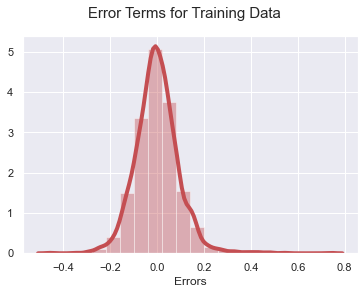

In [37]:
#Predicting y_train based on X_train_lm
y_train_pred = lr.predict(X_train_lm)

#Plotting the Graph
errorTermsPlot(y_train,y_train_pred,'r','Training','Errors')

Error Terms are Normally Distributed for the Training Data Prediction

### Making Predictions using Test Data of Model-1

In [38]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns.values]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lr.predict(X_test_new)

### Evaluation of Model-1

In [39]:
#Creating a function for y_test vs y_pred Plot
def yTest_vs_yPredPlot(y,y_hat,color):
    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(y,y_hat,color=color)
    fig.suptitle('y_test v/s y_pred', fontsize=15)            # Plot heading 
    plt.xlabel('y_test', fontsize=12)                          # X-label
    plt.ylabel('y_pred', fontsize=12)  

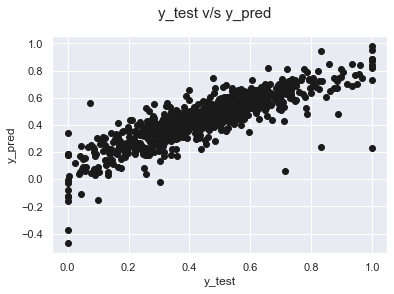

In [40]:
#Plotting y_test vs y_pred for Model 1
yTest_vs_yPredPlot(y_test,y_pred,'k')

Since the Data is not scattered and somewhat signifies Linear Relation, The Model is not good.

### Residual Analysis of Testing Data of Model 1  

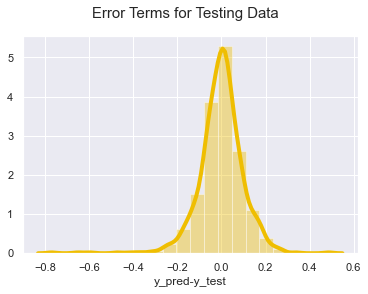

In [41]:
#Plotting the Graph for Test Errors
errorTermsPlot(y_pred,y_test,'#EFBE01','Testing','y_pred-y_test')

## Model-2 , Checking for High VIF values and Insignificant Features and performing   Backward Elimination in OLS Model

In [42]:
#Defining a function which will calculate the VIF values and store them in a DataFrame
#High VIF Means High Multicollinearity
def calculateVIF(X_train_lm):
    vif = pd.DataFrame()
    vif['Features'] = X_train_lm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False).reset_index()
    vif = vif.drop(columns = ['index'],axis = 1)
    return vif

In [43]:
#Calculating the VIF Values for Model-1
vif = calculateVIF(X_train_lm)
vif

,Features,VIF
0,const,893.87
1,popEst2015,107.35
2,avgDeathsPerYear,91.53
3,medIncome,26.42
4,PctPublicCoverage,25.37
5,PctPublicCoverageAlone,23.59
6,PctPrivateCoverage,19.50
7,binnedInc,14.84
8,MedianAgeFemale,13.54
9,povertyPercent,12.86


In [44]:
#Using the function defined above and dropping the Columns which have VIF value >= 10 
X_train_vif = X_train_lm.copy()

while True:

    #Calculating the VIF Values
    vif = calculateVIF(X_train_vif)

    #Dropping the Columns with VIF >= 10
    #vif.iloc[0,0] is 'const' , so we consider the columns from vif.iloc[1,0]
    if (vif.iloc[1,1] >= 10):
        print('Eliminating : ',vif.iloc[1,0])
        X_train_vif.drop(columns=[vif.iloc[1,0]], axis=1,inplace=True)

    else:
        break
        
#Removing 'const'
X_train_vif.drop(columns=[vif.iloc[0,0]],axis =1,inplace=True)

Eliminating :  popEst2015
Eliminating :  medIncome
Eliminating :  PctPublicCoverage
Eliminating :  PctPrivateCoverage
Eliminating :  MedianAgeFemale


In [45]:
#Defining a function to drop the Variables which are insignificant (have pvalue>0.05)
def dropPvalues(X_train):
    
    while True:
        # Add a constant
        X_train_lm = sm.add_constant(X_train[X_train.columns])
    
        # Create a first fitted model
        lr = sm.OLS(y_train, X_train_lm).fit()
    
        #Extracting pvalues from the model
        l = lr.pvalues
        l=l.sort_values(ascending=False)
        
        #Dropping the Column if pvalue>0.05
        if (l[0] > 0.05):
            print('Eliminating : ',l.index[0])
            X_train.drop(columns=[l.index[0]], axis=1,inplace=True)
    
        else:
            break
    print(lr.summary())
    return lr , X_train_lm

In [46]:
X_train1 = X_train[X_train_vif.columns.values].copy()

#Dropping the Columns with high P values and then using the obtained Columns to generate Model-2
lr1 , X_train_lm1 = dropPvalues(X_train1)

Eliminating :  PctEmpPrivCoverage
Eliminating :  PctPrivateCoverageAlone
Eliminating :  povertyPercent
Eliminating :  PctNoHS18_24
Eliminating :  AvgHouseholdSize
Eliminating :  PctEmployed16_Over
Eliminating :  studyPerCap
Eliminating :  PctBlack
Eliminating :  PctBachDeg18_24
Eliminating :  BirthRate
Eliminating :  MedianAgeMale
                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     158.0
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:19:54   Log-Likelihood:                 1328.5
No. Observations:                2132   AIC:                            -2625.
Df Residuals:                    2116   BIC:                            -2534.
Df Model:                          

### Residual Analysis of Training Data of Model-2

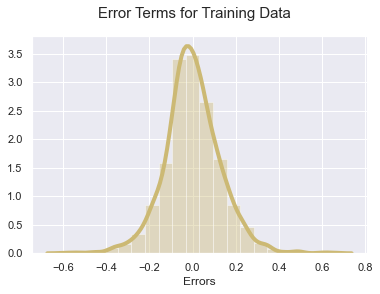

In [47]:
y_train_pred1 = lr1.predict(X_train_lm1)

errorTermsPlot(y_train,y_train_pred1,'y','Training','Errors')

### Making Predictions using Test Data of Model-2

In [48]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new1 = X_test[X_train1.columns.values]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new1)

# Making predictions
y_pred1 = lr1.predict(X_test_new1)

### Evaluation of Model-2

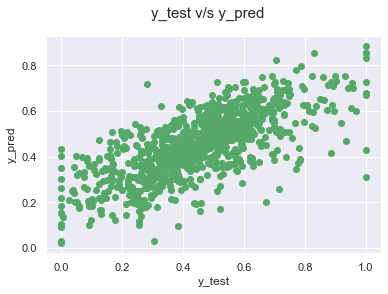

In [49]:
yTest_vs_yPredPlot(y_test,y_pred1,'g')        

### Residual Analysis of Testing Data of Model-2

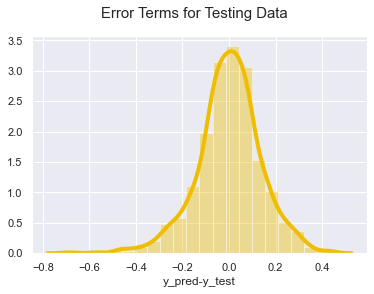

In [50]:
errorTermsPlot(y_pred1,y_test,'#EFBE01','Testing','y_pred-y_test')

## Model-3 Using Recursive Feature Elimination for Feature Selection and Model Building

In [51]:
#Fitting the Training Data to RFE model
estimator = SVR(kernel="linear")
rfe = RFE(estimator, step=1)
rfe = rfe.fit(X_train, y_train)

In [52]:
#Obtaining the Column Names, Whether they should be included in the Model or not and Their Ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('avgAnnCount', True, 1),
 ('avgDeathsPerYear', True, 1),
 ('incidenceRate', True, 1),
 ('medIncome', True, 1),
 ('popEst2015', True, 1),
 ('povertyPercent', False, 10),
 ('studyPerCap', False, 5),
 ('binnedInc', False, 15),
 ('MedianAge', False, 8),
 ('MedianAgeMale', False, 11),
 ('MedianAgeFemale', True, 1),
 ('AvgHouseholdSize', False, 13),
 ('PercentMarried', False, 9),
 ('PctNoHS18_24', False, 16),
 ('PctHS18_24', True, 1),
 ('PctBachDeg18_24', False, 17),
 ('PctHS25_Over', False, 7),
 ('PctBachDeg25_Over', True, 1),
 ('PctEmployed16_Over', True, 1),
 ('PctUnemployed16_Over', True, 1),
 ('PctPrivateCoverage', True, 1),
 ('PctPrivateCoverageAlone', False, 2),
 ('PctEmpPrivCoverage', False, 14),
 ('PctPublicCoverage', True, 1),
 ('PctPublicCoverageAlone', True, 1),
 ('PctWhite', False, 3),
 ('PctBlack', False, 12),
 ('PctAsian', False, 6),
 ('PctOtherRace', True, 1),
 ('PctMarriedHouseholds', True, 1),
 ('BirthRate', False, 4)]

In [53]:
#List of Supported Columns
col = X_train.columns[rfe.support_]
col

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'MedianAgeFemale', 'PctHS18_24', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctOtherRace',
       'PctMarriedHouseholds'],
      dtype='object')

In [54]:
# Adding a constant manually because OLS otherwise fits the line through the origin
X_train_rfe = sm.add_constant(X_train[col])
# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_rfe).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     427.5
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:19:59   Log-Likelihood:                 2013.2
No. Observations:                2132   AIC:                            -3994.
Df Residuals:                    2116   BIC:                            -3904.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Residual Analysis of Training Data of RFE Model, Model-3

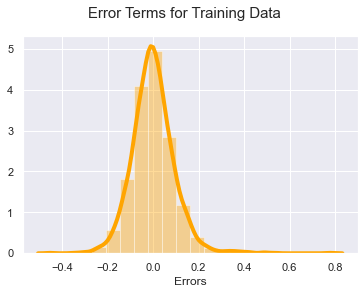

In [55]:
y_train_pred2 = lr2.predict(X_train_rfe)

errorTermsPlot(y_train,y_train_pred2,'Orange','Training','Errors')     

### Making Predictions using Test Data of Model-3, RFE Model

In [56]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new2 = X_test[col]

# Adding a constant variable 
X_test_new2 = sm.add_constant(X_test_new2)

# Making predictions
y_pred2 = lr2.predict(X_test_new2)

### Evaluation of Model-3, RFE Model

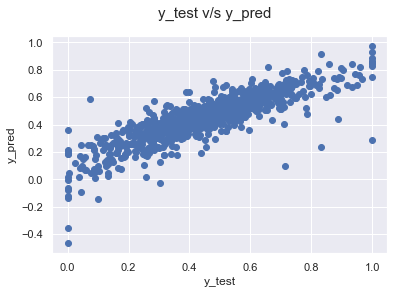

In [57]:
# Plotting y_test and y_pred to understand the spread.
yTest_vs_yPredPlot(y_test,y_pred2,'b')

### Residual Analysis of Testing Data of Model-3, RFE Model

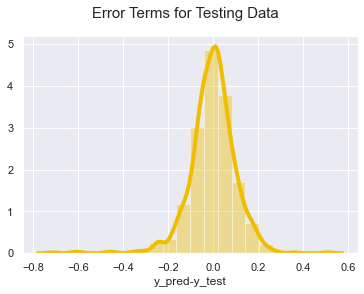

In [58]:
errorTermsPlot(y_pred2,y_test,'#EFBE01','Testing','y_pred-y_test')

## Model-4 Removing High VIF and High P valued Columns from Model-3, RFE Model

#### Checking for VIF values in Model-3, RFE Model

In [59]:
vif = calculateVIF(X_train[col])
vif

,Features,VIF
0,popEst2015,473.16
1,avgDeathsPerYear,466.46
2,PctPublicCoverage,113.42
3,PctPublicCoverageAlone,76.87
4,PctPrivateCoverage,47.85
5,MedianAgeFemale,34.87
6,medIncome,31.50
7,PctUnemployed16_Over,29.06
8,PctEmployed16_Over,26.34
9,PctBachDeg25_Over,19.80


##### Dropping Columns with VIF > 10

In [60]:
#Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_vif3 = X_train_rfe.copy()

while True:

    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = calculateVIF(X_train_vif3)

    if (vif.iloc[1,1] >= 10):
        X_train_vif3.drop(columns=[vif.iloc[1,0]], axis=1,inplace=True)

    else:
        break
        
X_train_vif3.drop(columns=[vif.iloc[0,0]],axis =1,inplace=True)

In [61]:
# Building a new model with new Features
X_train3 = X_train[X_train_vif3.columns.values].copy()

lr3 , X_train_lm3 = dropPvalues(X_train3)

Eliminating :  PctEmployed16_Over
Eliminating :  PctPublicCoverage
Eliminating :  PctUnemployed16_Over
                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     232.2
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:20:00   Log-Likelihood:                 1315.5
No. Observations:                2132   AIC:                            -2609.
Df Residuals:                    2121   BIC:                            -2547.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------

### Residual Analysis of Training Data of Model-4

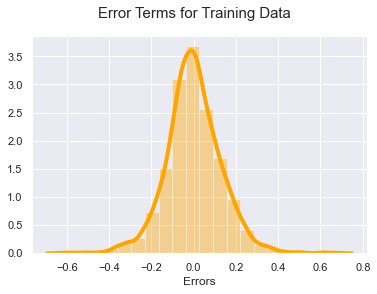

In [62]:
y_train_pred3 = lr3.predict(X_train_lm3)

errorTermsPlot(y_train,y_train_pred3,'orange','Training','Errors')

In [63]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new3 = X_test[X_train3.columns.values]

# Adding a constant variable 
X_test_new3 = sm.add_constant(X_test_new3)

# Making predictions
y_pred3 = lr3.predict(X_test_new3)

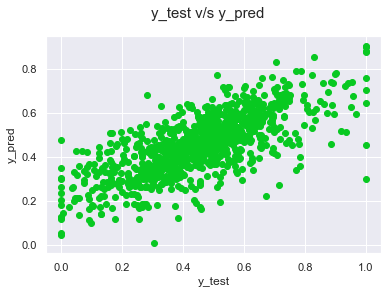

In [64]:
yTest_vs_yPredPlot(y_test,y_pred3,'#08C921')

### Residual Analysis of Testing Data of Model-4

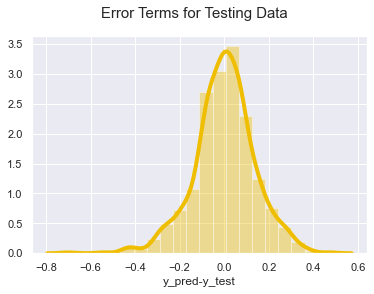

In [65]:
errorTermsPlot(y_pred3,y_test,'#EFBE01','Testing','y_pred-y_test')

## Selecting the Best Model by checking Error Metrics of all the Data Models

In [66]:
#Defining the Funtion 'errorMetrics' which will Calculate various paramets(Squared error, Mean Squared error,
#Root Mean Squared error and R-Squared Value)
def errorMetrics(y_pred,y):
    error = y_pred - y

    SE = np.square(error) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(error) / np.var(y))
    print('Squared Error',round(sum(SE),3) ,
          '\nMean Squared Error' , round(MSE,3),
          '\nRoot Mean Squared Error' , round(RMSE,3),
          '\nR Squared' , round(Rsquared,3),'\n\n')
    return Rsquared

In [67]:
#Passing the pred_variables to the function
pred_variables=[[y_train_pred,y_train],
                [y_pred,y_test],
                [y_train_pred1,y_train],
                [y_pred1,y_test],
                [y_train_pred2,y_train],
                [y_pred2,y_test],
                [y_train_pred3,y_train],
                [y_pred3,y_test]]

#Creating a Dictionary from which we will create a Dataframe later on
d = {'Train R2':[],'Test R2':[]}
j=1

for i in pred_variables:
    print('*'*40)
    if(j%2==0):
        print('---------Test Error of Model',int(j/2),'---------')
    else:
        print('---------Train Error of Model',int(j-(j/2)+1),'--------')
    
    #Calculating R2 value and appending them to Test R2 and Train R2 respectively
    r = errorMetrics(i[0],i[1])
    if(j%2==0):
        d['Test R2'].append(r)
    else:
        d['Train R2'].append(r)
    j+=1
print('*'*40)

#Creating a DataFrame from the above dictionary
models = pd.DataFrame(d,index=['OLS-all columns','OLS with (VIF<10 & p><0.05)' , 'RFE+OLS+VIF' ,'RFE+OLS with (VIF<10 & p<0.05)'])
models

****************************************
---------Train Error of Model 1 --------
Squared Error 18.476 
Mean Squared Error 0.009 
Root Mean Squared Error 0.093 
R Squared 0.757 


****************************************
---------Test Error of Model 1 ---------
Squared Error 9.433 
Mean Squared Error 0.01 
Root Mean Squared Error 0.102 
R Squared 0.735 


****************************************
---------Train Error of Model 2 --------
Squared Error 35.898 
Mean Squared Error 0.017 
Root Mean Squared Error 0.13 
R Squared 0.528 


****************************************
---------Test Error of Model 2 ---------
Squared Error 17.267 
Mean Squared Error 0.019 
Root Mean Squared Error 0.137 
R Squared 0.515 


****************************************
---------Train Error of Model 3 --------
Squared Error 18.885 
Mean Squared Error 0.009 
Root Mean Squared Error 0.094 
R Squared 0.752 


****************************************
---------Test Error of Model 3 ---------
Squared Error 9.507 


,Train R2,Test R2
OLS-all columns,0.757257,0.735211
OLS with (VIF<10 & p><0.05),0.528354,0.515121
RFE+OLS+VIF,0.751875,0.733073
RFE+OLS with (VIF<10 & p<0.05),0.522574,0.519512


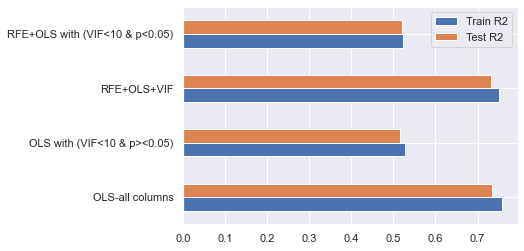

In [68]:
#Plotting the Bar Graph for all the Variables in the DataFrame 'models'
models.plot(kind='barh')

#### We can finally observe that Model-1 and Model-3 have high R2 values for both Test and Train Data but we will not choose them because:
#### 1. Model 1 contains all the Columns  and has high Multicollinearity
#### 2. Model 3 contains half the Columns but still has high Multicollinearity.
#### 3. Also there is a possibility that both of these have been overfitted as the y_test vs y_pred graph follows a Linear Relationship and is not Spread all over as it shoul have.

#### We can choose any one of Model-2 and Model-4 because they both have a better spread in the y_test vs y_pred graph and they both don't have Multicollinearity or any Insignificant Features

In [69]:
#Creating Equation for Model-2
l = np.around(np.array(lr1.params.values),3)
s=''
for i in zip(lr1.params.index,l):
    s += str(i[0]) + '    *     ' + str(i[1]) + '    +    '
print(s)

const    *     0.382    +    avgAnnCount    *     -0.198    +    avgDeathsPerYear    *     0.269    +    incidenceRate    *     0.378    +    binnedInc    *     -0.051    +    MedianAge    *     -0.141    +    PercentMarried    *     0.129    +    PctHS18_24    *     0.079    +    PctHS25_Over    *     0.063    +    PctBachDeg25_Over    *     -0.223    +    PctUnemployed16_Over    *     0.074    +    PctPublicCoverageAlone    *     0.056    +    PctWhite    *     -0.061    +    PctAsian    *     -0.079    +    PctOtherRace    *     -0.112    +    PctMarriedHouseholds    *     -0.165    +    


### For Model-2 , the equation is:
###### TARGET_deathRate    =    const    *     0.382    +    avgAnnCount    *     -0.198    +    avgDeathsPerYear    *     0.269    +    incidenceRate    *     0.378    +    binnedInc    *     -0.051    +    MedianAge    *     -0.141    +    PercentMarried    *     0.129    +    PctHS18_24    *     0.079    +    PctHS25_Over    *     0.063    +    PctBachDeg25_Over    *     -0.223    +    PctUnemployed16_Over    *     0.074    +    PctPublicCoverageAlone    *     0.056    +    PctWhite    *     -0.061    +    PctAsian    *     -0.079    +    PctOtherRace    *     -0.112    +    PctMarriedHouseholds    *     -0.165

In [70]:
#Creating Equation for Model-2
l = np.around(np.array(lr3.params.values),3)
s=''
for i in zip(lr3.params.index,l):
    s += str(i[0]) + '    *     ' + str(i[1]) + '    +    '
print(s)

const    *     0.524    +    avgAnnCount    *     -0.186    +    avgDeathsPerYear    *     0.248    +    incidenceRate    *     0.396    +    medIncome    *     -0.089    +    MedianAgeFemale    *     -0.09    +    PctHS18_24    *     0.097    +    PctBachDeg25_Over    *     -0.267    +    PctPrivateCoverage    *     -0.096    +    PctOtherRace    *     -0.141    +    PctMarriedHouseholds    *     -0.077    +    


### For Model-4, the equation is:
###### TARGET_deathRate    =    const    *     0.524    +    avgAnnCount    *     -0.186    +    avgDeathsPerYear    *     0.248    +    incidenceRate    *     0.396    +    medIncome    *     -0.089    +    MedianAgeFemale    *     -0.09    +    PctHS18_24    *     0.097    +    PctBachDeg25_Over    *     -0.267    +    PctPrivateCoverage    *     -0.096    +    PctOtherRace    *     -0.141    +    PctMarriedHouseholds    *     -0.077

I'll personally choose Model 4 because it has the fewest yet efficient predictor variables.

Thank You!